In [1]:
#import the libraries
import pandas as pd
import numpy as np
# for Box-Cox Transformation
from scipy import stats

# for min_max scaling
from mlxtend.preprocessing import minmax_scaling

# plotting modules
import seaborn as sns
import missingno

import matplotlib.pyplot as plt

df = pd.read_csv("Titanic.csv")
#print the first five rows of the data 
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
#As all the values in the "Parch" column is 0, we can eliminate the column

df.drop("Parch",axis=1, inplace=True)
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,237736,30.0708,NaN,C


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

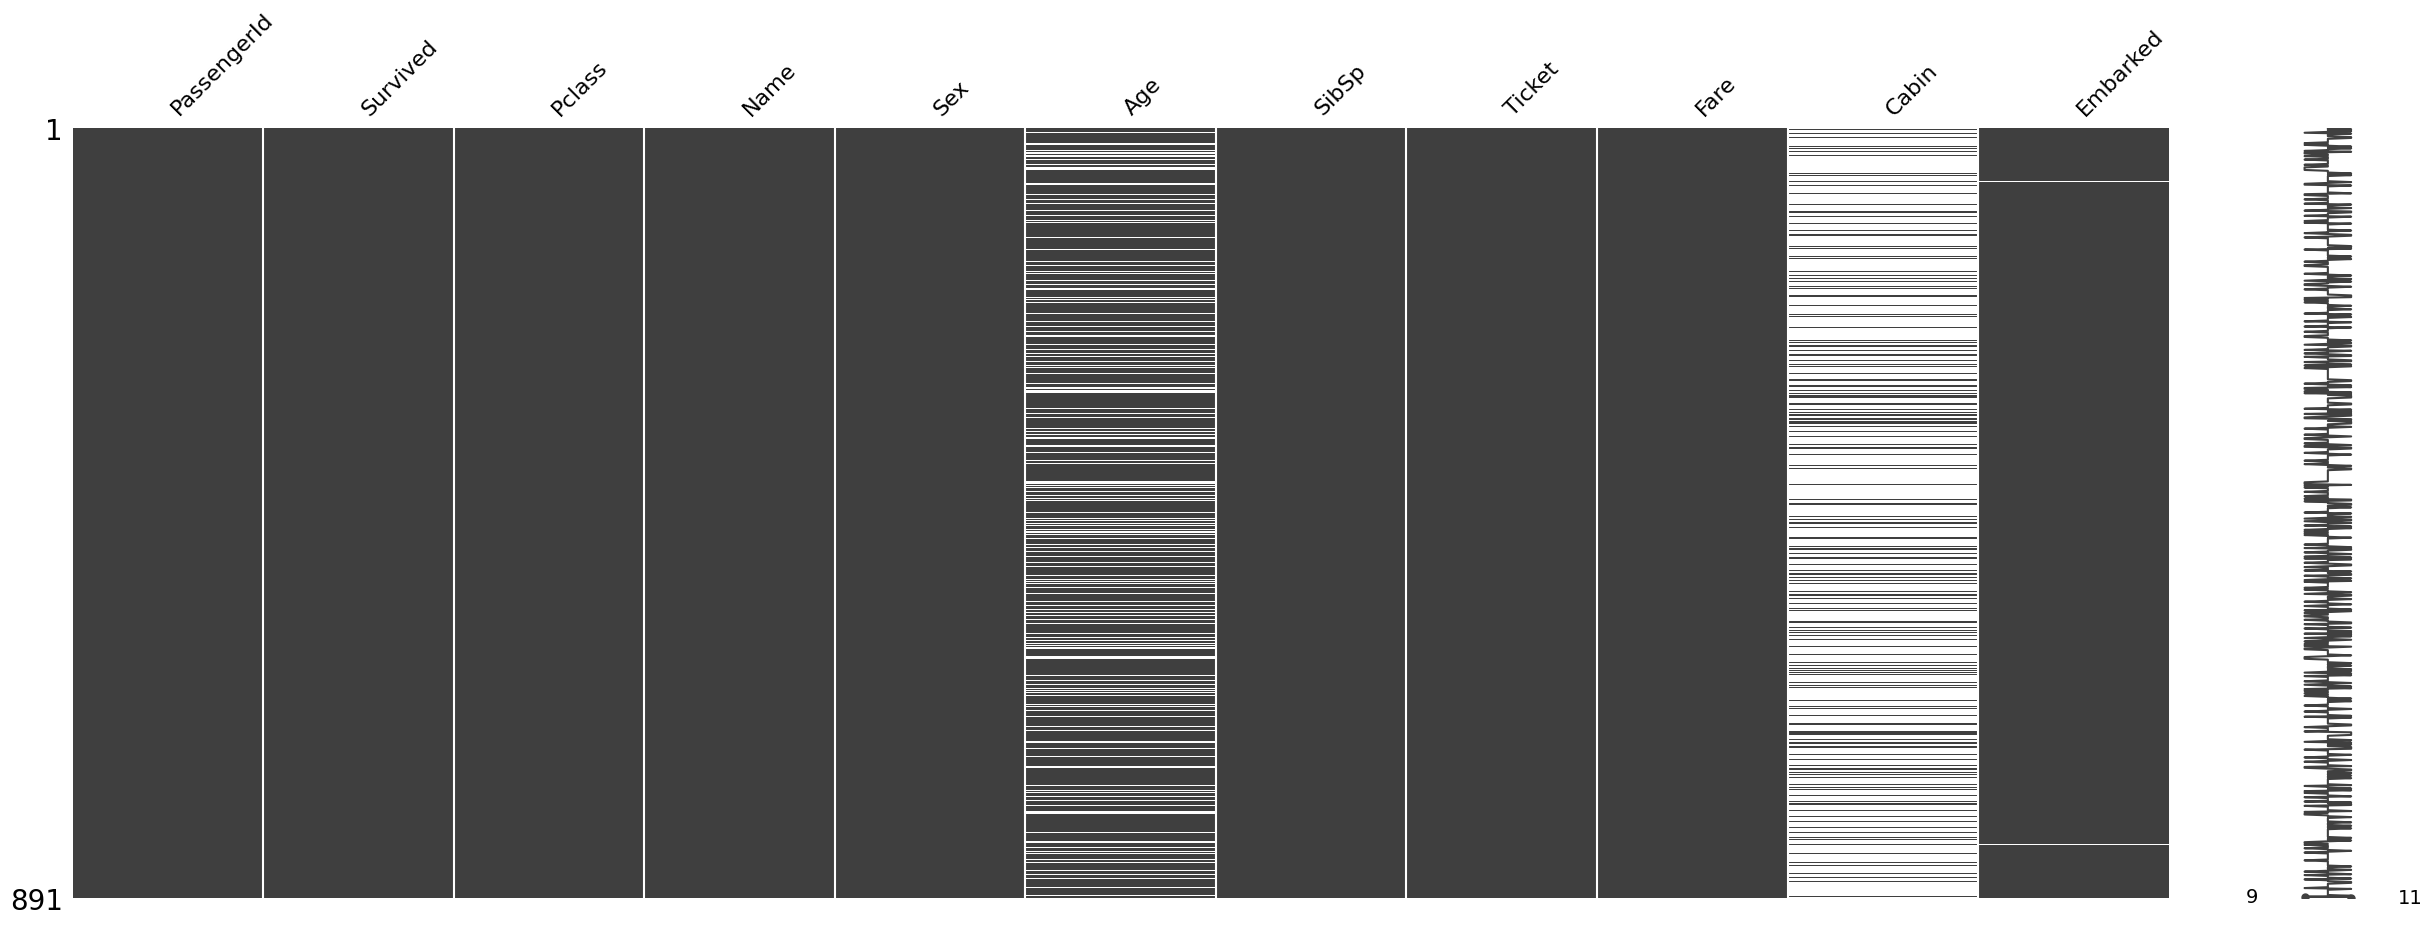

In [ ]:
# Plot graphic of missing values
missingno.matrix(df, figsize = (30,10))

#Check the data for missing information(per column)
missing_values_count = df.isnull().sum()

#check the first 10 columns
missing_values_count[0:11]

In [ ]:
#Create a temporary dataframe 
temp_df = df 
 
#replace all Na's with 0 
temp_df.fillna(0).head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,A/5 21171,7.2500,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,STON/O2. 3101282,7.9250,0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,373450,8.0500,0,S
5,6,0,3,"Moran, Mr. James",male,0.0,0,330877,8.4583,0,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,349909,21.0750,0,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,347742,11.1333,0,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,237736,30.0708,0,C


<Axes: >

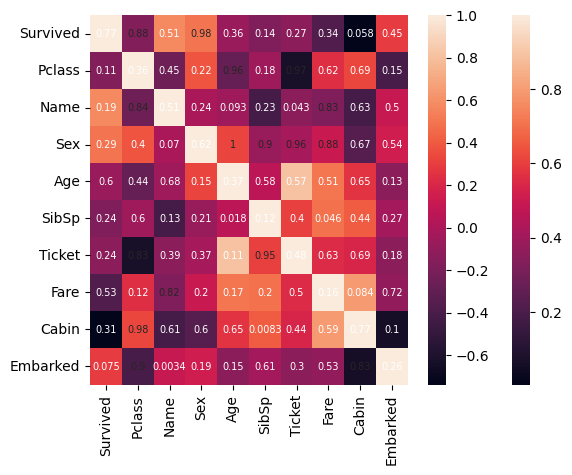

In [ ]:
#Plot a heatmap to visualize the relatioships between the data factors 
df = pd.DataFrame(np.random.random((10,10)), columns=["Survived","Pclass","Name","Sex","Age","SibSp","Ticket","Fare","Cabin","Embarked"])
p1=sns.heatmap(df, annot=True, annot_kws={"size": 7})
sns.heatmap(df.corr())

/usr/local/Caskroom/miniforge/base/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


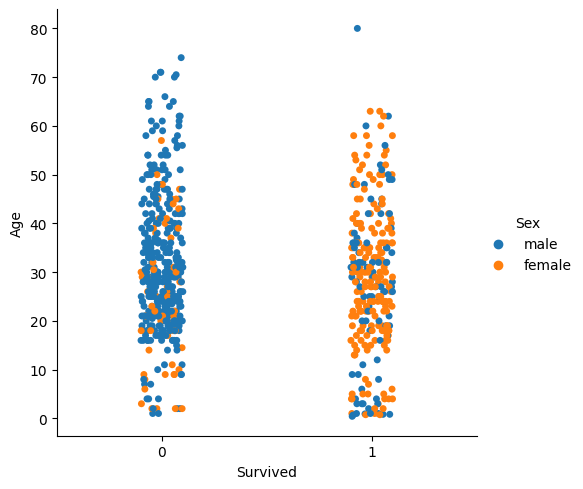

In [16]:
#Plot a factorplot to further explore the relationship patterns between the data factors 
factor_plot = sns.catplot(x ='Survived', y ='Age',
               hue = 'Sex', data = df)

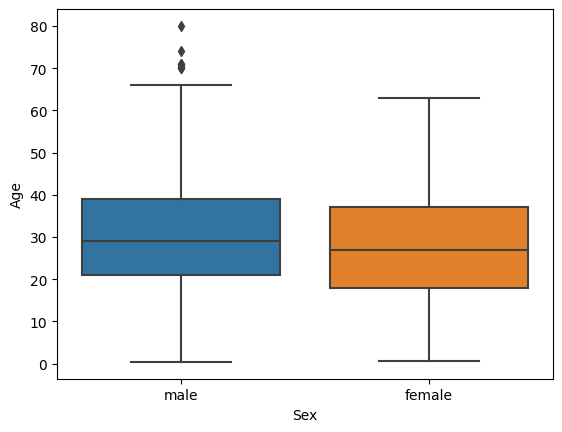

In [12]:
#Use different visual data representations for better understanding 
box_plotm=sns.boxplot( x=df["Sex"], y=df["Age"] )

Question: What is the most important factor in determining survival of the Titanic incident? 


Answer: Sex

Question: In the movie, the upper-class passangers were given preference on lifeboats. Does this show in the data?


Answer: Yes, the Pclass and Fare factors shows a strong positive correlation with the survival

Question: "Women and children first" Was this the case? 

Answer: Yes, the survived passengers are mostly women between the ages of 20 and 30, as well as children under the ages of 10.

Question: Add one other observation that you have noted in the dataset. 


Answer: The Name factor has also accredited a relationship with the survival, it could be further explored on which grounds this correlation is built. Could it underline the possible status relationship between passengers and survival chances?